In [1]:
pip install pandas matplotlib


     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ------------------- ------------------ 30.7/60.8 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 196.9 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 270.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/167.9 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.9 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.9 kB 653.6 kB/s eta 0:00:01
     --------- --------------------------- 41.0/167.9 kB 653.6 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/167.9 kB 350.1 kB/s eta 0:00:01
     -----------------------------------  163.8/167.9 kB 579.6

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Retrieved Data:
   id            timestamp  value
0   1  2024-11-21 16:09:56   10.5
1   2  2024-11-21 16:09:56   17.5
2   3  2024-11-21 16:10:04   10.5
3   4  2024-11-21 16:10:04   17.5
4   5  2024-11-21 16:10:23    7.5
5   6  2024-11-21 16:10:23    2.5

Data Analysis:
Mean Value: 11.0
Standard Deviation: 5.822370651203855


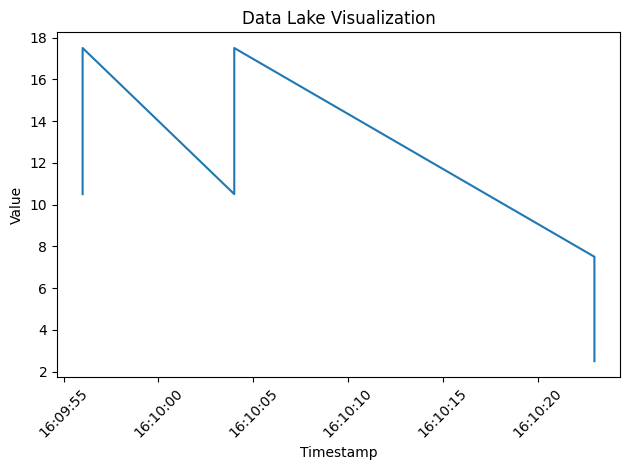

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


class DataLake:
    def __init__(self, db_file='datalake.db'):
        self.db_file = db_file
        self.conn = sqlite3.connect(db_file)
        self.create_table()

    def create_table(self):
        query = '''
        CREATE TABLE IF NOT EXISTS data (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            timestamp DATETIME DEFAULT CURRENT_TIMESTAMP,
            value FLOAT
        );
        '''
        self.conn.execute(query)
        self.conn.commit()

    def collect_data(self, value):
        query = 'INSERT INTO data (value) VALUES (?);'
        self.conn.execute(query, (value,))
        self.conn.commit()

    def retrieve_data(self):
        query = 'SELECT * FROM data;'
        data = pd.read_sql_query(query, self.conn)
        return data

    def analyze_data(self):
        data = self.retrieve_data()
        mean_value = data['value'].mean()
        std_dev = data['value'].std()
        return mean_value, std_dev

    def visualize_data(self):
        data = self.retrieve_data()
        data['timestamp'] = pd.to_datetime(data['timestamp'])  # Ensure timestamps are in datetime format
        plt.plot(data['timestamp'], data['value'])
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        plt.title('Data Lake Visualization')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


def main():
    data_lake = DataLake()
    data_lake.collect_data(7.5)
    data_lake.collect_data(2.5)
    retrieved_data = data_lake.retrieve_data()
    print("Retrieved Data:")
    print(retrieved_data)

    mean, std_dev = data_lake.analyze_data()
    print("\nData Analysis:")
    print(f"Mean Value: {mean}")
    print(f"Standard Deviation: {std_dev}")

    data_lake.visualize_data()


if __name__ == "__main__":
    main()
